In [1]:
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx


# Retrieve data

In [2]:
data_classical = scipy.io.loadmat('results/ABIDE_classification_gcn_cheby_0_3_150.mat')

filenames_for_experience_with_rd_graph_support = [
    'results/randomConnectivityABIDE_classification_gcn_cheby_0_3_150.mat',
    'results/randomConnectivity2ABIDE_classification_gcn_cheby_0_3_150.mat'
]

data_rd_graph_list = [scipy.io.loadmat(filename) for filename in filenames_for_experience_with_rd_graph_support]
print(data_classical.keys())  

dict_keys(['__header__', '__version__', '__globals__', 'lin', 'lin_auc', 'acc', 'auc', 'folds', 'final_graph', 'graph'])


In [3]:
# retrieve acc and auc
data = {
    'ridge_classifier_acc': data_classical['lin'].flatten()/100,
    'ridge_classifier_auc': data_classical['lin_auc'].flatten(),
    'GCN_acc': data_classical['acc'].flatten()/100,
    'GCN_auc': data_classical['auc'].flatten(),
    # 'folds': data['folds'].flatten()
}
for k, data_rd_graph in enumerate(data_rd_graph_list):
    data[f"rd{k+1}_GCN_acc"] = data_rd_graph['acc'].flatten()/100
    data[f"rd{k+1}_GCN_auc"] = data_rd_graph['auc'].flatten()

df = pd.DataFrame(data)
df

,ridge_classifier_acc,ridge_classifier_auc,GCN_acc,GCN_auc,rd1_GCN_acc,rd1_GCN_auc,rd2_GCN_acc,rd2_GCN_auc
0,0.52,0.592553,0.58,0.689894,0.51,0.598936,0.55,0.639362
1,0.59,0.707447,0.61,0.748936,0.59,0.713298,0.60,0.677128
2,0.56,0.661170,0.59,0.729255,0.57,0.677660,0.53,0.652128
3,0.60,0.739362,0.61,0.792553,0.59,0.775000,0.59,0.791489
4,0.58,0.707447,0.60,0.756915,0.52,0.644681,0.50,0.629255
5,0.59,0.678191,0.64,0.796809,0.61,0.749468,0.61,0.753191
6,0.69,0.886170,0.63,0.806915,0.58,0.795745,0.62,0.813298
7,0.55,0.689290,0.61,0.746554,0.61,0.714210,0.57,0.694592
8,0.51,0.612937,0.54,0.668081,0.50,0.655355,0.50,0.630435
9,0.57,0.699014,0.60,0.730150,0.55,0.708355,0.53,0.725999


In [4]:
graph_classical_GCN = data_classical['graph']
final_graph_classical_GCN = data_classical['final_graph']

graph_rd_GCN_list = [data_rd_graph['graph'] for data_rd_graph in data_rd_graph_list]
final_graph_rd_GCN_list = [data_rd_graph['final_graph'] for data_rd_graph in data_rd_graph_list]


# Plot Boxplot

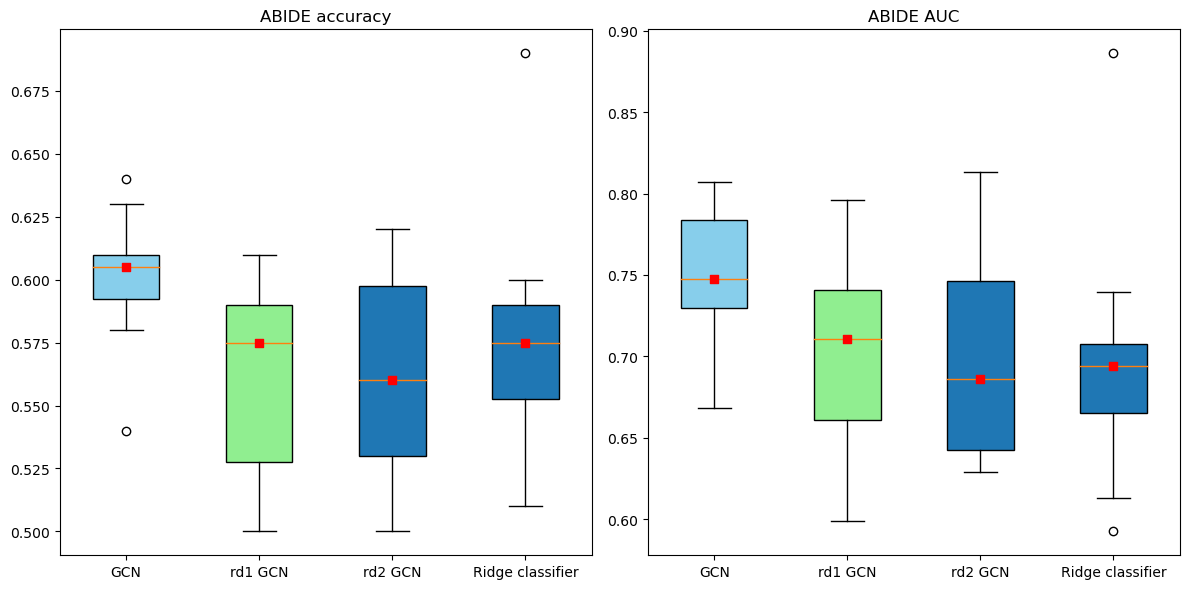

In [5]:
# Set colors for each boxplot
colors = ['skyblue', 'lightgreen', 'skyblue', 'lightgreen']

# Set useful params depending on the number of experience
N_RD_EXP = len(filenames_for_experience_with_rd_graph_support)
xticks_list = np.arange(2 + N_RD_EXP) +1
xticks_lables = ['GCN'] + [f'rd{k+1} GCN' for k in range(N_RD_EXP)] + ['Ridge classifier']


# Create the first plot for lin and acc
plt.figure(figsize=(12, 6))

# Boxplot for lin and acc
plt.subplot(1, 2, 1)
Y = [df['GCN_acc']] + [df[f'rd{k+1}_GCN_acc'] for k in range(N_RD_EXP)] + [df['ridge_classifier_acc']]
bp1 = plt.boxplot(Y, patch_artist=True, widths=0.5)

# Color the boxes for the first subplot
for patch, color in zip(bp1['boxes'], colors[:2]):
    patch.set_facecolor(color)

# Add red square for the mean
for i, median in enumerate(bp1['medians']):
    median_value = median.get_ydata()[0]
    plt.scatter(i+1, median_value, color='red', marker='s', zorder=5)

# Set titles and labels
plt.title('ABIDE accuracy')
plt.xticks(xticks_list, xticks_lables)

# Create the second plot for lin_auc and auc
plt.subplot(1, 2, 2)
Y = [df['GCN_auc']] + [df[f'rd{k+1}_GCN_auc'] for k in range(N_RD_EXP)] + [df['ridge_classifier_auc']]
bp2 = plt.boxplot(Y, patch_artist=True, widths=0.5)

# Color the boxes for the second subplot
for patch, color in zip(bp2['boxes'], colors[2:]):
    patch.set_facecolor(color)

# Add red square for the mean
for i, median in enumerate(bp2['medians']):
    median_value = median.get_ydata()[0]
    plt.scatter(i+1, median_value, color='red', marker='s', zorder=5)

# Set titles and labels
plt.title('ABIDE AUC')
plt.xticks(xticks_list, xticks_lables)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


# Visualize connectivity matrix

In [6]:
# import networkx as nx
# import matplotlib.pyplot as plt

# # Create a graph
# G = nx.gnp_random_graph(n=10, p=0.1)  # A random graph with 100 nodes and 10% connection probability

# # Plot with NetworkX and Matplotlib
# plt.figure(figsize=(12, 8))
# pos = nx.spring_layout(G)  # Use spring layout for a spread-out visualization
# nx.draw(G, pos, node_size=20, with_labels=False)
# plt.show()


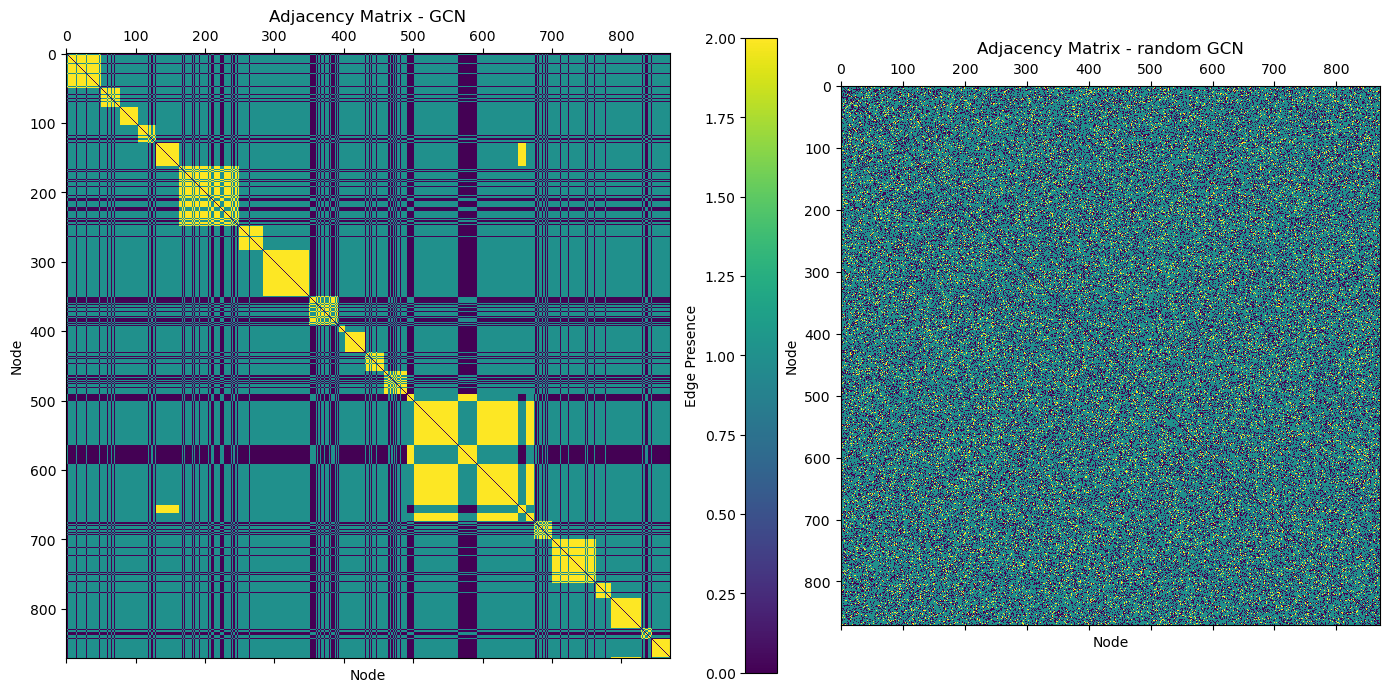

In [7]:
G1 = graph_classical_GCN
G2 = graph_rd_GCN_list[0]

min_val = min(G1.min(), G2.min())
max_val = max(G1.max(), G2.max())

# Plot the two adjacency matrices side-by-side with a shared color bar
fig, axs = plt.subplots(1, 2, figsize=(14, 7), gridspec_kw={'width_ratios': [1, 1.05]})

# Plot first adjacency matrix with shared color limits
im1 = axs[0].matshow(G1, cmap="viridis", vmin=min_val, vmax=max_val)
axs[0].set_title("Adjacency Matrix - GCN")
axs[0].set_xlabel("Node")
axs[0].set_ylabel("Node")

# Plot second adjacency matrix with shared color limits
im2 = axs[1].matshow(G2, cmap="viridis", vmin=min_val, vmax=max_val)
axs[1].set_title("Adjacency Matrix - random GCN")
axs[1].set_xlabel("Node")
axs[1].set_ylabel("Node")

# Add a single color bar to the left of the second plot, representing both matrices
cbar = fig.colorbar(im2, ax=axs[1], orientation="vertical", fraction=0.05, pad=0.1, location="left", label="Edge Presence")

plt.tight_layout()
plt.show()


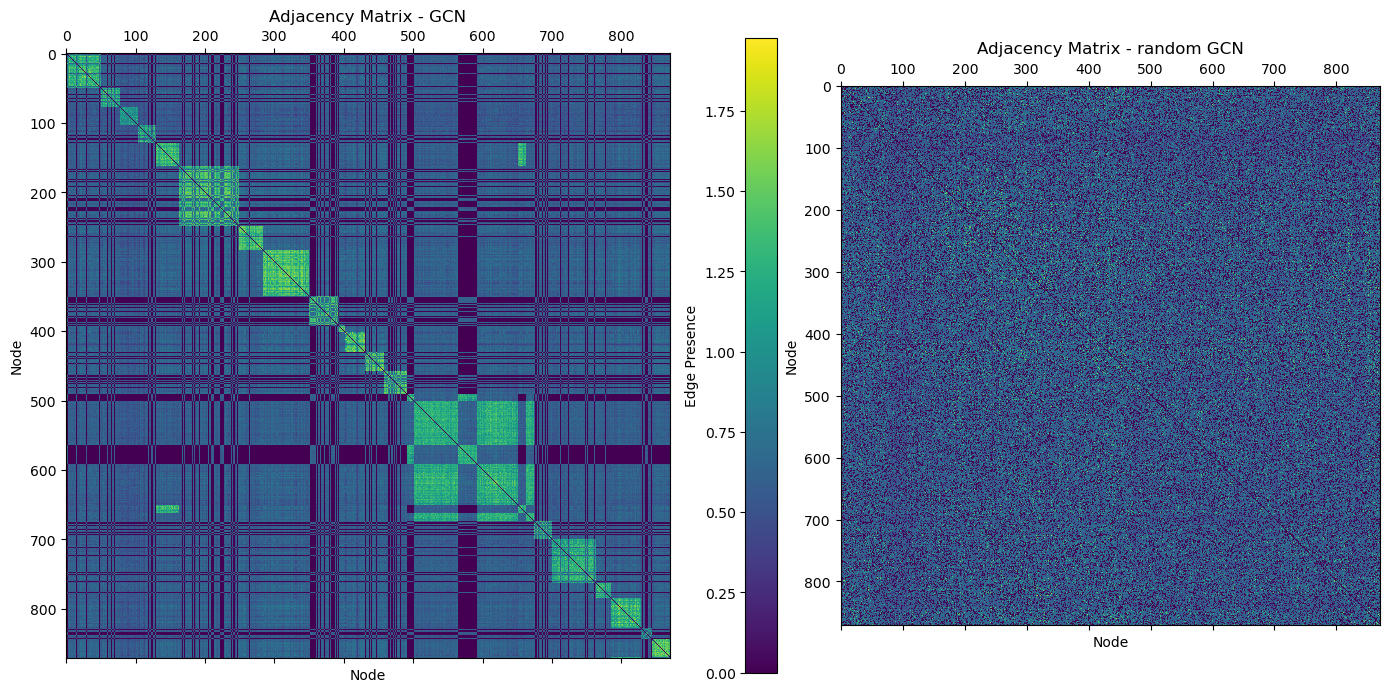

In [8]:
G1 = final_graph_classical_GCN[1]
G2 = final_graph_rd_GCN_list[1][1]

min_val = min(G1.min(), G2.min())
max_val = max(G1.max(), G2.max())

# Plot the two adjacency matrices side-by-side with a shared color bar
fig, axs = plt.subplots(1, 2, figsize=(14, 7), gridspec_kw={'width_ratios': [1, 1.05]})

# Plot first adjacency matrix with shared color limits
im1 = axs[0].matshow(G1, cmap="viridis", vmin=min_val, vmax=max_val)
axs[0].set_title("Adjacency Matrix - GCN")
axs[0].set_xlabel("Node")
axs[0].set_ylabel("Node")

# Plot second adjacency matrix with shared color limits
im2 = axs[1].matshow(G2, cmap="viridis", vmin=min_val, vmax=max_val)
axs[1].set_title("Adjacency Matrix - random GCN")
axs[1].set_xlabel("Node")
axs[1].set_ylabel("Node")

# Add a single color bar to the left of the second plot, representing both matrices
cbar = fig.colorbar(im2, ax=axs[1], orientation="vertical", fraction=0.05, pad=0.1, location="left", label="Edge Presence")

plt.tight_layout()
plt.show()


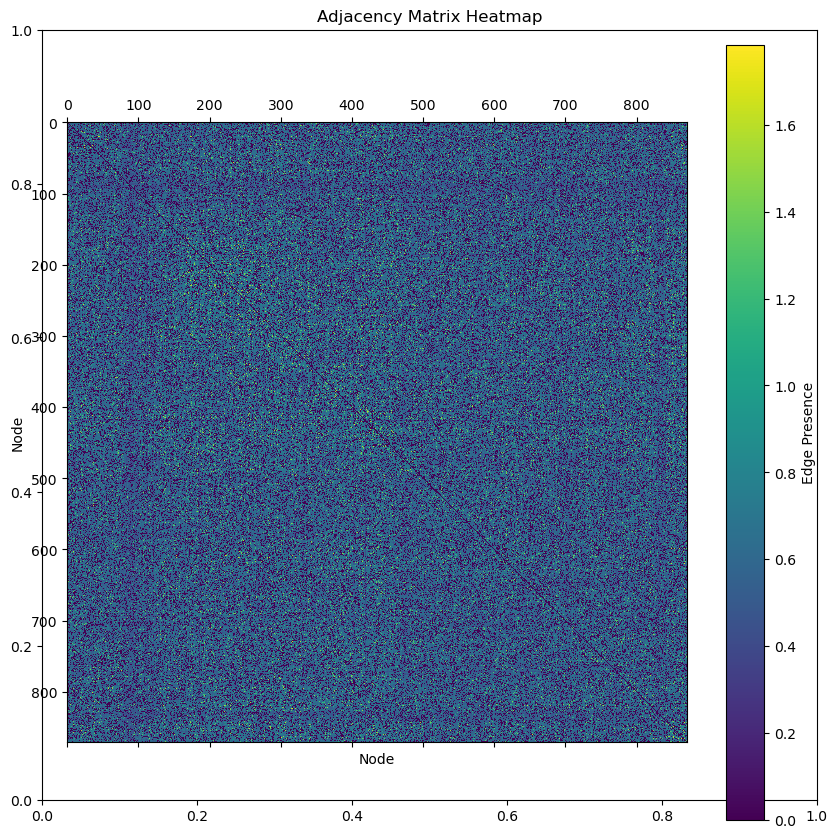

In [9]:
G2 = final_graph_rd_GCN_list[1][1]

# Plot the adjacency matrix
plt.figure(figsize=(10, 10))
plt.title("Adjacency Matrix Heatmap")
plt.matshow(G2, fignum=1, cmap="viridis")  # Use 'viridis' or 'Blues' for contrast
plt.colorbar(label="Edge Presence")
plt.xlabel("Node")
plt.ylabel("Node")
plt.show()
